In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv("./data/1297.csv", delimiter=";", quotechar="|", index_col="id")
df.shape

(9800, 19)

In [4]:
df

,title,price,rooms,bathrooms,size,parking_space,type,number,neighborhood_name,population,houses,area,street_name,zip_code,flood_quota,latitude,longitude,modality_name,company_name
id,,,,,,,,,,,,,,,,,,,
68,Casa à Venda em Blumenau no bairro Itoupava Ce...,550000.0,3,3,157.0,4,casa,39.0,Itoupava Central,28164,8715,45.0,Rua Bruno Mordhorst,89062-244,17.65,-26.826011,-49.079903,venda,portal_imoveis
69,Sobrado à Venda em Blumenau no bairro Água Verde,510000.0,3,3,200.0,2,sobrado,321.0,Agua Verde,16186,5526,5.0,Rua Max Weise,89032-280,NaN,-26.905491,-49.134670,venda,portal_imoveis
70,"Apartamento com 2 dormitórios à venda, 54 m² p...",220000.0,2,1,54.0,1,apartamento,NaN,Passo Manso,6799,2069,7.0,Rua Elvira Bornhofen,89032-464,NaN,-26.907082,-49.154649,venda,zap_imoveis
71,"Apartamento mobiliado com 2 dormitórios, 1 vag...",220000.0,2,1,50.0,1,apartamento,NaN,Agua Verde,16186,5526,5.0,Rua Margarida Waldrich,89042-160,NaN,-26.911047,-49.126418,venda,zap_imoveis
73,Apartamento todo mobiliado bairro água verde.,220000.0,2,1,55.0,1,apartamento,NaN,Passo Manso,6799,2069,7.0,Rua Alex Oechsler,89032-680,NaN,-26.906185,-49.145922,venda,zap_imoveis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20280,excelente casa com terreno de 3 600,1490000.0,3,3,330.0,2,casa,NaN,Ponta Aguda,9880,3233,7.0,Rua Luiz Eleodoro Da Silva,89050-501,14.85,-26.901248,-49.046918,venda,zap_imoveis
20281,Blumenau - Apartamento Padrão - Jardim Blumenau,1490000.0,2,1,183.0,3,apartamento,NaN,Jardim Blumenau,2855,1004,1.0,Rua Lauro Mueller,89010-380,NaN,-26.929161,-49.063261,venda,zap_imoveis
20282,"Apartamento com 3 dormitórios à venda, 137 m² ...",1490000.0,3,4,137.0,3,apartamento,NaN,Victor Konder,4612,1990,1.0,Rua Timbo,89012-180,11.40,-26.909295,-49.075682,venda,zap_imoveis


Normalizando tipos

In [5]:
def normalize_type(value):
    if value == "penthouse":
        return "apartamento"
    
    elif value == "flat":
        return "apartamento"

    elif value == "loft":
        return "apartamento"

    elif value == "sobrado":
        return "casa"

    elif value == "geminada": 
        return "casa"
    
    elif value == "condominium":
        return "casa"
    
    elif value == "kitnet":
        return "casa"
    
    return value

df["main_type"] = df["type"].apply(normalize_type)

Convertendo cota de enchente

In [6]:
def convert_flood_quota(value):
    return 21 if pd.isna(value) else value

# Use the apply method with the custom function
df["flood_quota"] = df["flood_quota"].apply(convert_flood_quota)

Segurança

In [7]:
def check_security(value):
    if value < 8.13:
        return 1
    
    elif 8.14 < value < 9.15:
        return 2
    
    elif 9.16 < value < 12.6:
        return 3
    
    else:
        return 4

df["security"] = df["flood_quota"].apply(check_security)

Agrupando preços

In [8]:
df_venda = df[df["modality_name"] == "venda"]

In [66]:
df_venda['price_group'] = pd.qcut(df_venda['price'], q=30)

C:\Users\user\AppData\Local\Temp\ipykernel_23548\2465953288.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Agrupando tamanhos

In [67]:
df_venda['size_group'] = pd.qcut(df_venda['size'], q=20)

C:\Users\user\AppData\Local\Temp\ipykernel_23548\1875451635.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
properties = df_venda.loc[:, ["price", "rooms", "bathrooms", "size", "parking_space", "main_type", "neighborhood_name", "street_name", "zip_code", "security", "latitude", "longitude"]]
properties

,price,rooms,bathrooms,size,parking_space,main_type,neighborhood_name,street_name,zip_code,security,latitude,longitude
id,,,,,,,,,,,,
68,550000.0,3,3,157.0,4,casa,Itoupava Central,Rua Bruno Mordhorst,89062-244,4,-26.826011,-49.079903
69,510000.0,3,3,200.0,2,casa,Agua Verde,Rua Max Weise,89032-280,4,-26.905491,-49.134670
70,220000.0,2,1,54.0,1,apartamento,Passo Manso,Rua Elvira Bornhofen,89032-464,4,-26.907082,-49.154649
71,220000.0,2,1,50.0,1,apartamento,Agua Verde,Rua Margarida Waldrich,89042-160,4,-26.911047,-49.126418
73,220000.0,2,1,55.0,1,apartamento,Passo Manso,Rua Alex Oechsler,89032-680,4,-26.906185,-49.145922
...,...,...,...,...,...,...,...,...,...,...,...,...
20279,1488350.0,3,3,137.0,3,apartamento,Victor Konder,Rua Timbo,89012-180,3,-26.909295,-49.075682
20280,1490000.0,3,3,330.0,2,casa,Ponta Aguda,Rua Luiz Eleodoro Da Silva,89050-501,4,-26.901248,-49.046918
20281,1490000.0,2,1,183.0,3,apartamento,Jardim Blumenau,Rua Lauro Mueller,89010-380,4,-26.929161,-49.063261


In [138]:
properties.describe()

,price,rooms,bathrooms,size,parking_space,security,latitude,longitude
count,4.819000e+03,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000
mean,5.241347e+05,2.179913,1.828388,602.039326,1.452999,3.880473,-26.894976,-49.089910
std,2.922204e+05,1.277988,1.239407,7604.395979,1.102104,0.324441,0.036717,0.027922
min,1.100000e+05,0.000000,0.000000,0.000000,0.000000,3.000000,-27.299805,-49.628929
25%,3.219020e+05,2.000000,1.000000,75.000000,1.000000,4.000000,-26.914219,-49.102230
50%,4.600000e+05,2.000000,2.000000,116.000000,1.000000,4.000000,-26.901878,-49.087884
75%,6.800000e+05,3.000000,3.000000,222.465000,2.000000,4.000000,-26.877138,-49.073786
max,5.489000e+06,10.000000,10.000000,420000.000000,11.000000,4.000000,-26.641906,-48.597424


Quantidade de quartos

In [10]:
rooms_quantity = np.unique(properties["rooms"], return_counts=True)
bathrooms_quantity = np.unique(properties["bathrooms"], return_counts=True)
parking_spaces_quantity = np.unique(properties["parking_space"], return_counts=True)

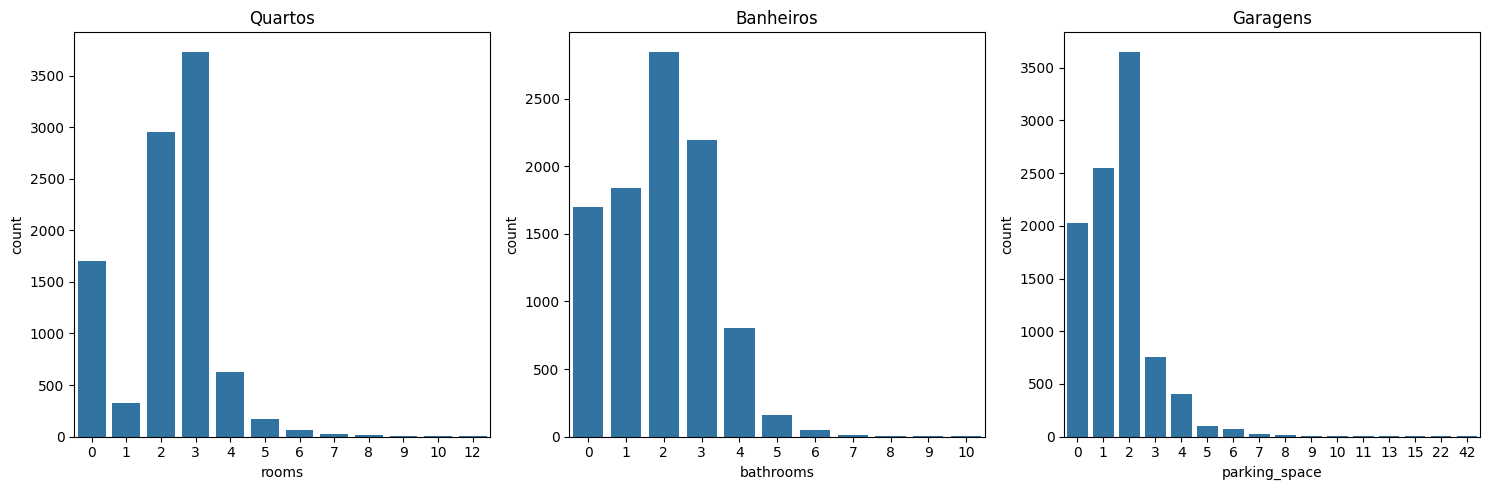

In [11]:
# sns.countplot(x=properties["rooms"]);
# sns.countplot(x=properties["bathrooms"]);
# sns.countplot(x=properties["parking_space"]);

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plotando cada gráfico nos subplots correspondentes
sns.countplot(x=properties["rooms"], ax=axes[0])
sns.countplot(x=properties["bathrooms"], ax=axes[1])
sns.countplot(x=properties["parking_space"], ax=axes[2])

# Definindo títulos para cada gráfico (opcional)
axes[0].set_title('Quartos')
axes[1].set_title('Banheiros')
axes[2].set_title('Garagens')

# Exibindo os gráficos
plt.tight_layout()
plt.show()

Quantidade de banheiros

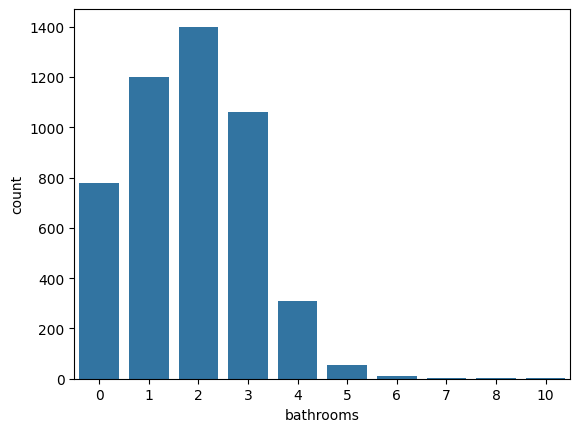

In [27]:
sns.countplot(x=properties["bathrooms"]);

Quantidade de vagas de estacionamento

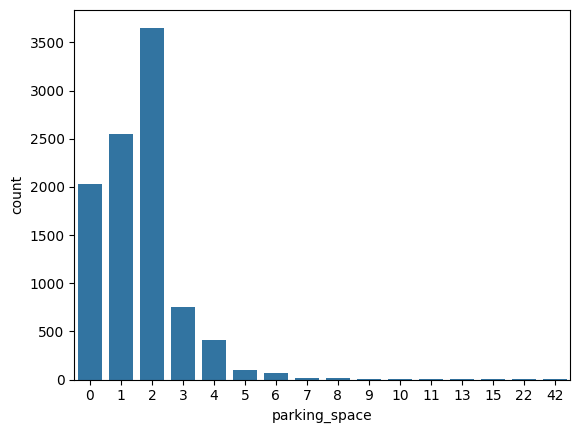

In [12]:
sns.countplot(x=properties["parking_space"]);

Grupo de tamanhos

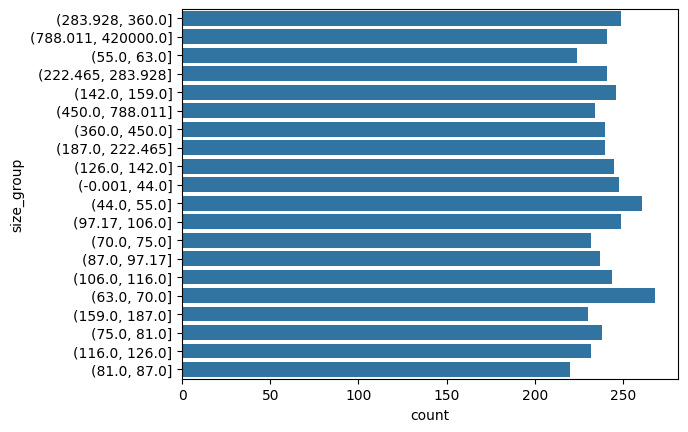

In [29]:
# sns.countplot(y=properties["size_group"], order=properties["size_group"]);

Grupo de preços

In [30]:
# sns.countplot(y=properties["price_group"], order=properties["price_group"]);

Grafico de dispersao do preço, tamanho e quantidade de quartos

In [72]:
grafico = px.scatter_matrix(properties, dimensions=["price", "rooms"], color="price")
grafico

In [14]:
grafico = px.treemap(properties, path=["main_type", "neighborhood_name"])
grafico

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'branchvalues': 'total',
              'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'labels=%{label}<br>count=%{value}<br>parent=%{parent}<br>id=%{id}<extra></extra>',
              'ids': array(['apartamento/Agua Verde', 'casa/Agua Verde', 'loteterreno/Agua Verde',
                            'apartamento/Badenfurt', 'casa/Badenfurt', 'loteterreno/Badenfurt',
                            'apartamento/Boa Vista', 'casa/Boa Vista', 'loteterreno/Boa Vista',
                            'apartamento/Bom Retiro', 'casa/Bom Retiro', 'loteterreno/Bom Retiro',
                            'apartamento/Centro', 'casa/Centro', 'loteterreno/Centro',
                            'apartamento/Da Gloria', 'casa/Da Gloria', 'loteterreno/Da Gloria',
                            'apartamento/Do Salto', 'casa/Do Salto', 'loteterreno/Do Salto',
                            'apartamento/Escola Agricola', 'casa/Escola Agricola',
                            'loteterreno/Escola Agricola', 'apartamento/Fidelis', 'casa/Fidelis',
                            'loteterreno/Fidelis', 'apartamento/Fortaleza', 'casa/Fortaleza',
                            'loteterreno/Fortaleza', 'apartamento/Fortaleza Alta',
                            'casa/Fortaleza Alta', 'loteterreno/Fortaleza Alta',
                            'apartamento/Garcia', 'casa/Garcia', 'loteterreno/Garcia',
                            'apartamento/Itoupava Central', 'casa/Itoupava Central',
                            'loteterreno/Itoupava Central', 'apartamento/Itoupava Norte',
                            'casa/Itoupava Norte', 'loteterreno/Itoupava Norte',
                            'apartamento/Itoupava Seca', 'casa/Itoupava Seca',
                            'loteterreno/Itoupava Seca', 'apartamento/Itoupavazinha',
                            'casa/Itoupavazinha', 'loteterreno/Itoupavazinha',
                            'apartamento/Jardim Blumenau', 'casa/Jardim Blumenau',
                            'loteterreno/Jardim Blumenau', 'apartamento/Nova Esperanca',
                            'casa/Nova Esperanca', 'loteterreno/Nova Esperanca',
                            'apartamento/Passo Manso', 'casa/Passo Manso',
                            'loteterreno/Passo Manso', 'apartamento/Ponta Aguda',
                            'casa/Ponta Aguda', 'loteterreno/Ponta Aguda', 'apartamento/Progresso',
                            'casa/Progresso', 'loteterreno/Progresso',
                            'apartamento/Ribeirao Fresco', 'casa/Ribeirao Fresco',
                            'loteterreno/Ribeirao Fresco', 'apartamento/Salto Do Norte',
                            'casa/Salto Do Norte', 'loteterreno/Salto Do Norte',
                            'apartamento/Salto Weissbach', 'casa/Salto Weissbach',
                            'loteterreno/Salto Weissbach', 'casa/Testo Salto',
                            'loteterreno/Testo Salto', 'apartamento/Tribess', 'casa/Tribess',
                            'loteterreno/Tribess', 'apartamento/Valparaiso', 'casa/Valparaiso',
                            'loteterreno/Valparaiso', 'apartamento/Velha', 'casa/Velha',
                            'loteterreno/Velha', 'apartamento/Velha Central', 'casa/Velha Central',
                            'loteterreno/Velha Central', 'two_story_house/Velha Central',
                            'casa/Velha Grande', 'loteterreno/Velha Grande',
                            'apartamento/Victor Konder', 'casa/Victor Konder',
                            'loteterreno/Victor Konder', 'apartamento/Vila Formosa',
                            'casa/Vila Formosa', 'apartamento/Vila Nova', 'casa/Vila Nova',
                            'loteterreno/Vila Nova', 'apartamento/Vorstadt', 'casa/Vorstadt',
                            'loteterreno/Vorstadt', 'apartamento', 'casa', 'loteterreno',
                            'two_story_house'], dtype=object),
              'labels': array(['Agua Ver

In [33]:
grafico = px.parallel_categories(properties, dimensions=["main_type", "parking_space"])
grafico

Separando variaveis

In [23]:
properties

,price,rooms,bathrooms,size,parking_space,main_type,neighborhood_name,street_name,zip_code,security,latitude,longitude
id,,,,,,,,,,,,
2,1500000.0,3,4,325.00,2,casa,Itoupava Norte,Rua Olga Krutzsch,89053-073,4,-26.878599,-49.079493
4,560000.0,3,2,822.26,1,casa,Progresso,Rua Germano Roeder,89026-250,4,-26.965439,-49.076319
8,111080.0,2,1,62.00,1,apartamento,Itoupava Central,Rua Professor Jacob Ineichen,89066-598,4,-26.842643,-49.111331
10,950000.0,3,4,259.50,2,casa,Itoupava Norte,Rua Xaverio Eble,89053-460,4,-26.871724,-49.077842
11,380000.0,4,2,150.00,1,apartamento,Vila Nova,Rua Theodoro Holtrup,89035-300,4,-26.909702,-49.082541
...,...,...,...,...,...,...,...,...,...,...,...,...
9685,1100000.0,3,4,260.00,2,apartamento,Vorstadt,Rua Sao Bento,89015-300,4,-26.904420,-49.043170
9686,1100000.0,0,0,776.00,0,loteterreno,Itoupava Seca,Rua Otto Hennings,89030-040,4,-26.897091,-49.081495
9688,1100000.0,3,3,383.00,2,casa,Fortaleza,Rua Alberto Felicio Adriano,89055-050,4,-26.877373,-49.064536


In [15]:
x_properties = properties.iloc[:, 1: 10]
x_properties

,rooms,bathrooms,size,parking_space,main_type,neighborhood_name,street_name,zip_code,security
id,,,,,,,,,
68,3,3,157.0,4,casa,Itoupava Central,Rua Bruno Mordhorst,89062-244,4
69,3,3,200.0,2,casa,Agua Verde,Rua Max Weise,89032-280,4
70,2,1,54.0,1,apartamento,Passo Manso,Rua Elvira Bornhofen,89032-464,4
71,2,1,50.0,1,apartamento,Agua Verde,Rua Margarida Waldrich,89042-160,4
73,2,1,55.0,1,apartamento,Passo Manso,Rua Alex Oechsler,89032-680,4
...,...,...,...,...,...,...,...,...,...
20279,3,3,137.0,3,apartamento,Victor Konder,Rua Timbo,89012-180,3
20280,3,3,330.0,2,casa,Ponta Aguda,Rua Luiz Eleodoro Da Silva,89050-501,4
20281,2,1,183.0,3,apartamento,Jardim Blumenau,Rua Lauro Mueller,89010-380,4


In [16]:
y_properties = properties.iloc[:,0]
y_properties

id
68        550000.0
69        510000.0
70        220000.0
71        220000.0
73        220000.0
           ...    
20279    1488350.0
20280    1490000.0
20281    1490000.0
20282    1490000.0
20283    1490000.0
Name: price, Length: 9621, dtype: float64

Aplicando encoder

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
label_encoder_main_type = LabelEncoder()
label_encoder_neighborhood = LabelEncoder()
label_encoder_street_name = LabelEncoder()
label_encoder_zip_code = LabelEncoder()

# label_encoder_price_group = LabelEncoder()

In [19]:
# x_properties.iloc[:, 2] = label_encoder_size_group.fit_transform(x_properties.iloc[:, 2])
x_properties.iloc[:, 4] = label_encoder_main_type.fit_transform(x_properties.iloc[:, 4])
x_properties.iloc[:, 5] = label_encoder_neighborhood.fit_transform(x_properties.iloc[:, 5])
x_properties.iloc[:, 6] = label_encoder_street_name.fit_transform(x_properties.iloc[:, 6])
x_properties.iloc[:, 7] = label_encoder_zip_code.fit_transform(x_properties.iloc[:, 7])

In [40]:
# y_properties = label_encoder_price_group.fit_transform(y_properties)

In [20]:
temp = x_properties.copy(deep=True)
temp["price"] = y_properties
temp.rename(columns={"rooms": "Quartos", "bathrooms": "Banheiros", "parking_space": "Garagens", "size": "Tamanho em m²", "main_type": "Tipo de Imóvel", "neighborhood_name": "Bairro", "street_name": "Rua", "zip_code": "CEP", "security": "Cota de enchente", "price": "Preço"}, inplace=True)
temp

,Quartos,Banheiros,Tamanho em m²,Garagens,Tipo de Imóvel,Bairro,Rua,CEP,Cota de enchente,Preço
id,,,,,,,,,,
68,3,3,157.0,4,1,12,271,1201,4,550000.0
69,3,3,200.0,2,1,0,1055,400,4,510000.0
70,2,1,54.0,1,0,18,475,428,4,220000.0
71,2,1,50.0,1,0,0,1011,750,4,220000.0
73,2,1,55.0,1,0,18,60,441,4,220000.0
...,...,...,...,...,...,...,...,...,...,...
20279,3,3,137.0,3,0,30,1408,64,3,1488350.0
20280,3,3,330.0,2,1,19,972,900,4,1490000.0
20281,2,1,183.0,3,0,16,931,27,4,1490000.0


<Axes: title={'center': 'Matriz Pearson de Correlações'}>

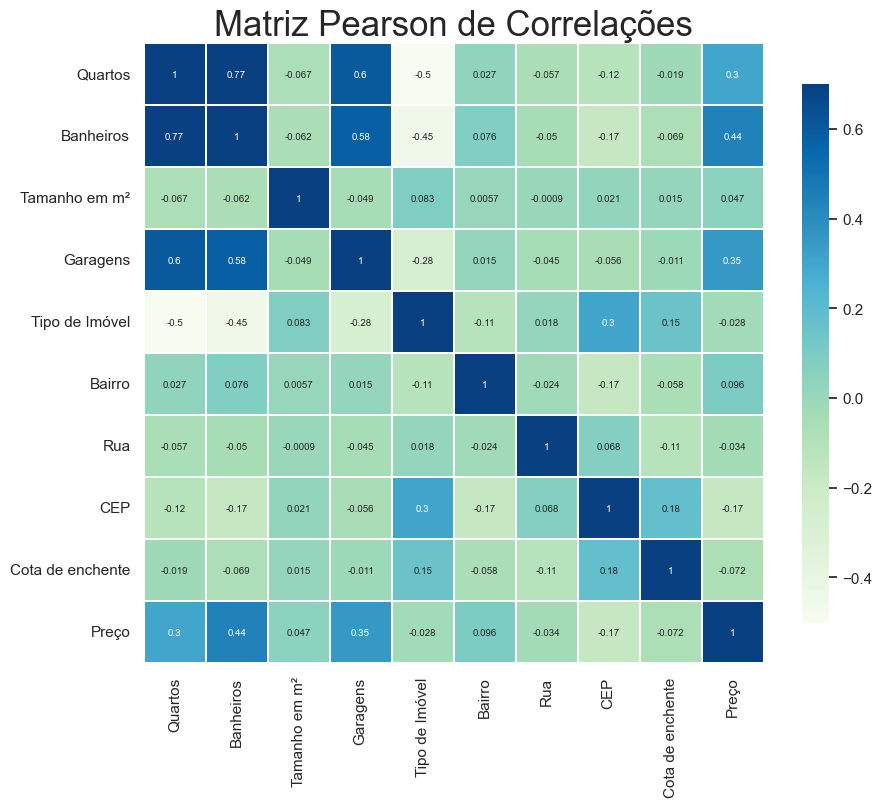

In [21]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(10,10))
plt.title('Matriz Pearson de Correlações',fontsize=25)
sns.heatmap(temp.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

Onehot encoder

Continuar daqui o texto

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [23]:
onehot_encoder_properties = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [4,5,6,7])], remainder="passthrough")

In [24]:
hot_properties = onehot_encoder_properties.fit_transform(x_properties).toarray()

In [25]:
hot_properties.shape

(9621, 3037)

Padronização dos dados

In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
scaler_properties = StandardScaler()
x_scaler_properties = scaler_properties.fit_transform(hot_properties)

In [165]:
x_scaler_properties[0]

array([-0.8226525 ,  1.16517471, -0.45614932, ..., -0.03643525,
        0.49637616,  0.36844675])

Padronanização

In [96]:
from sklearn.preprocessing import Normalizer

In [97]:
normalized_properties = Normalizer()
x_normalized_properties = normalized_properties.fit_transform(hot_properties)

In [99]:
x_normalized_properties[0]

array([0.        , 0.00307647, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00307647, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00922941, 0.01230589, 0.99985329,
       0.00615294])

In [88]:
hot_properties[0]

array([  0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   3.,   4., 325.,   2.])

Separação das bases

- 75% da base para treino
- 25% para teste

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
x_properties_train, x_properties_test, y_properties_train, y_properties_test = train_test_split(x_scaler_properties, y_properties, test_size=0.20, random_state=0)

In [168]:
x_properties_train.shape, x_properties_test.shape

((3855, 2154), (964, 2154))

In [169]:
y_properties_train.shape, y_properties_test.shape

((3855,), (964,))

Salvar base formatada

In [170]:
import pickle

In [171]:
with open("./data/complete_properties.pkl", mode="wb") as file:
    pickle.dump([x_properties_train, y_properties_train, x_properties_test, y_properties_test], file)

: 